# APUESTAS EN LA RULETA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Método Martingala

### REFERENCIAS
- https://blog.bodog.com/es/sistema-martingala-ruletas/
- https://blog.sportium.es/metodo-martingala-ruleta-infalible/
- https://www.casino.org/es/ruleta/estrategia/#calculator-sistema-martingala

In [2]:
def estrategia_martingala(estado, capital, apuesta):
    if (estado == "gano"):
        capital += apuesta
        apuesta = tipo_capital[capital_elegido]['apuesta']
    else:
        capital -= apuesta
        apuesta *=2
    return capital, apuesta

## Método D'Alembert

### REFERENCIAS
- https://www.casino.org/es/ruleta/estrategia/#calculator-sistema-martingala
- https://www.bettingexpert.com/es/casino/ruleta/estrategia-ruleta/dalembert
- https://blog.bodog.com/es/sistema-de-ruleta-dalembert/

In [3]:
def estrategia_dalembert(estado, capital, apuesta):
    if (estado == "gano"):
        if(apuesta == 1):
            pass
        else:
            capital += apuesta
            apuesta -= 1
    else:
        capital -= apuesta
        apuesta += 1
        
    return capital, apuesta

## Método Oscar Grind

### REFERENCIAS
- https://www.casinonewsdaily.es/estrategias-los-casinos/sistema-apuestas-oscars-grind/

In [16]:
def estrategia_oscar(estado, capital, apuesta):
    if (estado == "gano"):
        capital += apuesta
        apuesta += 1
    else:
        capital -= apuesta
    return capital, apuesta

#### ================================================================

In [20]:
def verifica_color(numero_aleatorio):
    if (numero_aleatorio == 0):
        color_sale = "verde"
    elif (numero_aleatorio in tipos_apuestas["color"]["rojo"]):
        color_sale = "rojo"
    else: 
        color_sale = "negro"
    return color_sale

In [21]:
def verifica_paridad(numero_aleatorio):
    if (numero_aleatorio == 0):
        return "cero"
    elif (numero_aleatorio%2 == 0):
        return "par"
    return "impar"

In [22]:
def verifica_mitad(numero_aleatorio):
    if (numero_aleatorio == 0):
        return "cero"
    elif (numero_aleatorio <= 18):
        return "falta"
    return "pasa"

In [232]:
def estrategias(capital_elegido, maximo_tiradas, estrategia_elegida, tipo_apuesta_elegida, subtipo_apuesta):
    capital = tipo_capital[capital_elegido]['capital']
    apuesta = tipo_capital[capital_elegido]['apuesta']
    
    # si la estrategia es oscar grind, la apuesta inicial es 1
    if (estrategia_elegida == "oscar" and capital_elegido == "finito"):
        apuesta = 1
    
    contador_tiradas = 0
    cantidad_ganadas = 0

    capital_segun_tiradas = []
    tiradas = []
    estados_segun_tiradas = []
    apuestas_segun_tiradas = []
    numero_segun_tiradas = []
    juegos_que_salieron = []
    fr_segun_tiradas = []

    while (apuesta < capital):
        contador_tiradas +=1
        numero_aleatorio = np.random.randint(0,37)
        
        tiradas.append(contador_tiradas)
        capital_segun_tiradas.append(capital)
        apuestas_segun_tiradas.append(apuesta)
        numero_segun_tiradas.append(numero_aleatorio)
        
        
        

        estado = "perdio" 
          
        if (tipo_apuesta_elegida == "color"):
            color_sale = verifica_color(numero_aleatorio)
            juegos_que_salieron.append(color_sale)
            if (color_sale == subtipo_apuesta):
                estado = "gano"
        elif (tipo_apuesta_elegida == "paridad"):
            paridad_sale = verifica_paridad(numero_aleatorio)
            juegos_que_salieron.append(paridad_sale)
            if (paridad_sale == subtipo_apuesta):
                estado = "gano"
        else:
            mitad_sale = verifica_mitad(numero_aleatorio)
            juegos_que_salieron.append(mitad_sale)
            if (mitad_sale == subtipo_apuesta):
                estado = "gano" 
        
        if (estado == "gano"):
            cantidad_ganadas += 1
        frecuencia_relativa = 100*(cantidad_ganadas/contador_tiradas)
        fr_segun_tiradas.append(frecuencia_relativa)
        estados_segun_tiradas.append(estado)
        
        if (estrategia_elegida == "oscar"):
            # si se elige la estrategia oscar grind, al ganar por lo menos una unidad segun el capital inicial, termina la serie
            if (capital > tipo_capital[capital_elegido]['capital']):
                break
        
        if (estrategia_elegida == "dalembert"):
            capital, apuesta = estrategia_dalembert(estado, capital, apuesta)
        elif (estrategia_elegida == "martingala"):
            capital, apuesta = estrategia_martingala(estado, capital, apuesta)
        elif (estrategia_elegida == "oscar"):
            capital, apuesta = estrategia_oscar(estado, capital, apuesta)
            
        
        if(contador_tiradas==maximo_tiradas):
            break
           
            
    listado_tiradas = list(zip(tiradas, capital_segun_tiradas, apuestas_segun_tiradas, numero_segun_tiradas, estados_segun_tiradas, juegos_que_salieron, fr_segun_tiradas))
    tiradas_df = pd.DataFrame(data = listado_tiradas, columns = ['tirada', 'capital', 'apuesta', 'numero','estado', 'salio', 'frecuencia relativa'])
    return tiradas_df

In [198]:
def grafico_frecuencia_relativa(corridas, capital_elegido, estrategia_elegida, maximo_tiradas, contador, cantidad_corridas):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)

    ax.set_title(f"FRECUENCIA RELATIVA ESTRATEGIA {estrategia_elegida.upper()} CAPITAL {capital_elegido.upper()} PARA LA CORRIDA {contador}/{cantidad_corridas}", color="C0")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('fr (frecuencia relativa)')

    ax.bar(corrida['tirada'], corrida['frecuencia relativa'], label='frsa (frecuencia relativa de obtener la apuesta favorable segun n)')
    
    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="x", colors="C0")
   
    
    ax.xaxis.label.set_color('C0')
    ax.yaxis.label.set_color('C0')
    plt.xticks(np.arange(1, maximo_tiradas+1, 1))
    plt.legend()
    plt.savefig(f"img/{estrategia_elegida}/fr-estrategia-{estrategia_elegida}-capital-{capital_elegido}-corrida-{contador}-de-{cantidad_corridas}-corridas.png")
    plt.show()

In [199]:
def grafico_estrategias(corridas, capital_elegido, estrategia_elegida, maximo_tiradas):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1,1,1)

    ax.set_title(f"ESTRATEGIA {estrategia_elegida.upper()} CAPITAL {capital_elegido.upper()} PARA {len(corridas)} CORRIDAS", color="C0")
    ax.set_xlabel('n (número de tiradas)')
    ax.set_ylabel('cc (cantidad de capital)')

    for corrida in corridas:
        ax.plot(corrida['capital'], label="fc (flujo de caja)")

    ax.axhline(tipo_capital[capital_elegido]['capital'], label="fci (flujo de caja inicial)", color="black")
    
    ax.tick_params(axis="y", colors="C0")
    ax.tick_params(axis="x", colors="C0")

    ax.xaxis.label.set_color('C0')
    ax.yaxis.label.set_color('C0')

    plt.legend()
    plt.savefig(f"img/{estrategia_elegida}/estrategia-{estrategia_elegida}-capital-{capital_elegido}-{len(corridas)}-corridas.png")
    plt.show()

In [200]:
estrategias_opciones = ["martingala", "dalembert", "oscar"]
tipos_apuestas = {
    "color": {
        "rojo": [1, 3, 5, 7, 9, 12, 14, 16, 18, 19, 21, 23, 25, 27, 30, 32, 34, 36],
        "negro": [2, 4, 6, 8, 10, 11, 13, 15, 17, 20, 22, 24, 26, 28, 29, 31, 33, 35]
    },
    "paridad": {
        "par": [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36],
        'impar': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]
    },
    'mitades': {
        '1': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
        '2': [19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]
    }
}
tipo_capital = {
    "finito": {
        "capital": 100,
        "apuesta": 5
    },
    "infinito": {
        "capital": 100000,
        "apuesta": 500
    }
}

En la siguiente celda estan los datos que se pueden modificar segun querramos

In [240]:
# capital inicial, escribir "finito" o "infinito"
capital_elegido = "infinito"

# elegir el tipo de apuesta: "paridad", "color" o "mitades"
tipo_apuesta_elegida = "color"

if (tipo_apuesta_elegida == "color"):
    # elegir el color al que se va a apostar, "rojo" o "negro"
    subtipo_apuesta = "negro"
elif (tipo_apuesta_elegida == "paridad"):
    # elegir la paridad a la que se va a apostar, "par" o "impar"
    subtipo_apuesta = "par"
elif (tipo_apuesta_elegida == "mitades"):
    # elegir la mitad a la que se va a apostar, "falta" (1-18) o "pasa" (19-36)
    subtipo_apuesta = "falta"

# elegir la estrategia elegida, 0 para "martingala", 1 para "dalembert", 2 para "oscar grind" entre los []
estrategia_elegida = estrategias_opciones[2]
# elegir la cantidad maxima de tiradas
maximo_tiradas = 20
# elegir la cantidad de corridas
cantidad_corridas = 1

print("DATOS INGRESADOS:")
print(f"TIPO DE CAPITAL: {capital_elegido}")
print(f"CAPITAL: {tipo_capital[capital_elegido]['capital']}")
print(f"APUESTA INCIAL: {tipo_capital[capital_elegido]['apuesta']}")
print(f"ESTRATEGIA: {estrategia_elegida}")
print(f"TIPO DE APUESTA: {tipo_apuesta_elegida}")
print(f"SUBTIPO DE APUESTA: {subtipo_apuesta}")
print(f"CANTIDAD DE CORRIDAS: {cantidad_corridas}")

DATOS INGRESADOS:
TIPO DE CAPITAL: infinito
CAPITAL: 100000
APUESTA INCIAL: 500
ESTRATEGIA: oscar
TIPO DE APUESTA: color
SUBTIPO DE APUESTA: negro
CANTIDAD DE CORRIDAS: 1


In [256]:
corridas = []

for corrida in range(cantidad_corridas):
    tiradas_df = estrategias(capital_elegido, maximo_tiradas, estrategia_elegida, tipo_apuesta_elegida, subtipo_apuesta)
    corridas.append(tiradas_df)

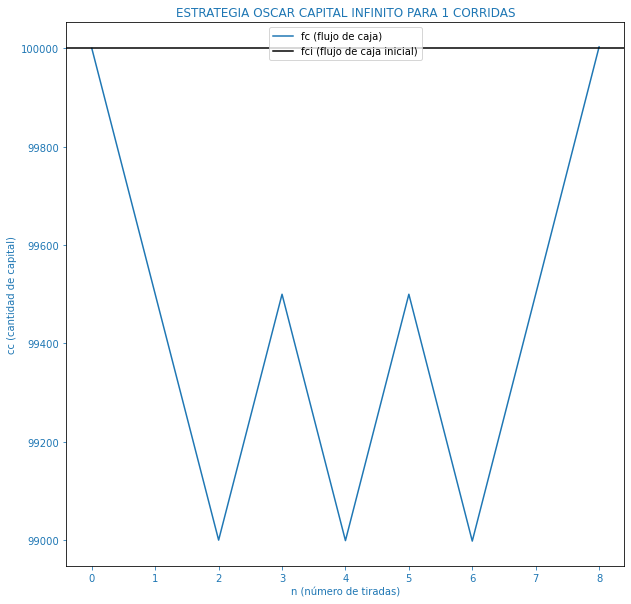

In [257]:
grafico_estrategias(corridas, capital_elegido, estrategia_elegida, maximo_tiradas)

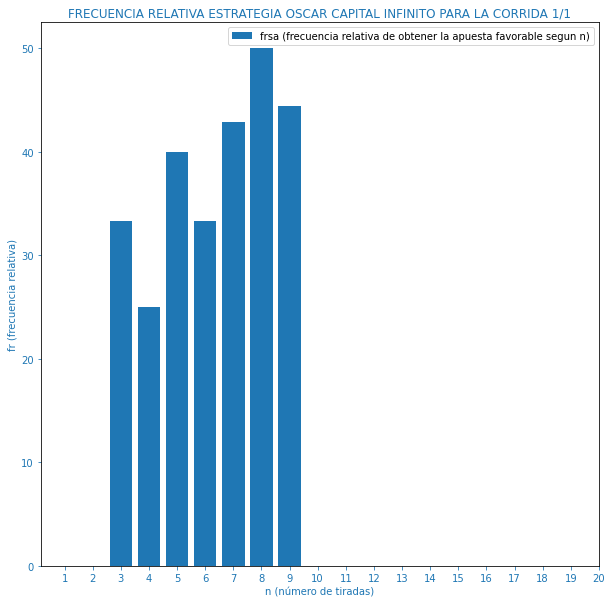

In [258]:
contador = 0
for corrida in corridas:
    contador += 1
    cantidad_corridas = len(corridas)
    grafico_frecuencia_relativa(corrida, capital_elegido, estrategia_elegida, maximo_tiradas, contador, cantidad_corridas)

In [259]:
corridas

[   tirada  capital  apuesta  numero  estado  salio  frecuencia relativa
 0       1   100000      500      12  perdio   rojo             0.000000
 1       2    99500      500      21  perdio   rojo             0.000000
 2       3    99000      500      29    gano  negro            33.333333
 3       4    99500      501      19  perdio   rojo            25.000000
 4       5    98999      501       2    gano  negro            40.000000
 5       6    99500      502      18  perdio   rojo            33.333333
 6       7    98998      502       6    gano  negro            42.857143
 7       8    99500      503       2    gano  negro            50.000000
 8       9   100003      504      30  perdio   rojo            44.444444]